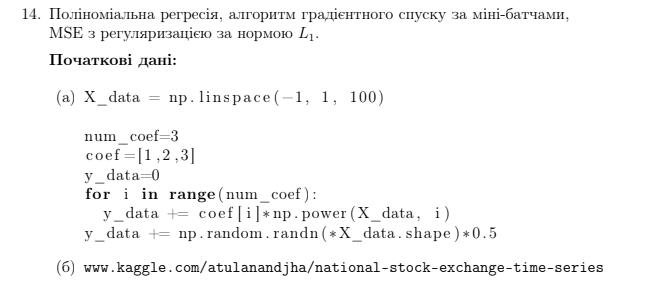

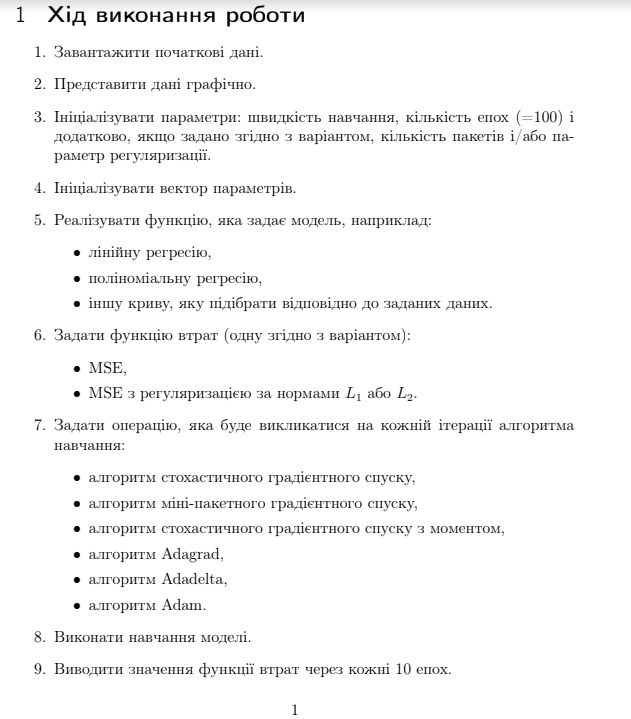

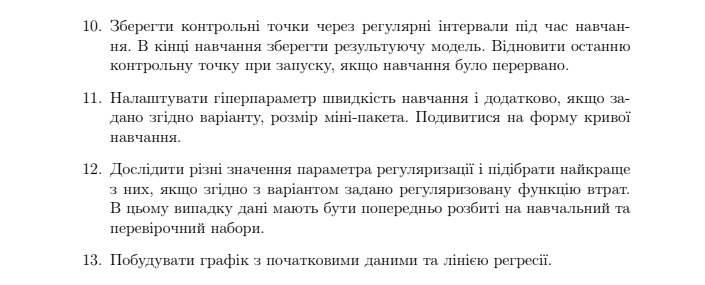

# Libraries

In [64]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading 

### Dataset A

In [2]:
x = np.linspace(-1, 1, 100)

num_coef = 3
coef = [1, 2, 3]
y = 0

for i in range(num_coef):
    y += coef[i]*np.power(x, i)
    
y += np.random.randn(*x.shape) * 0.5

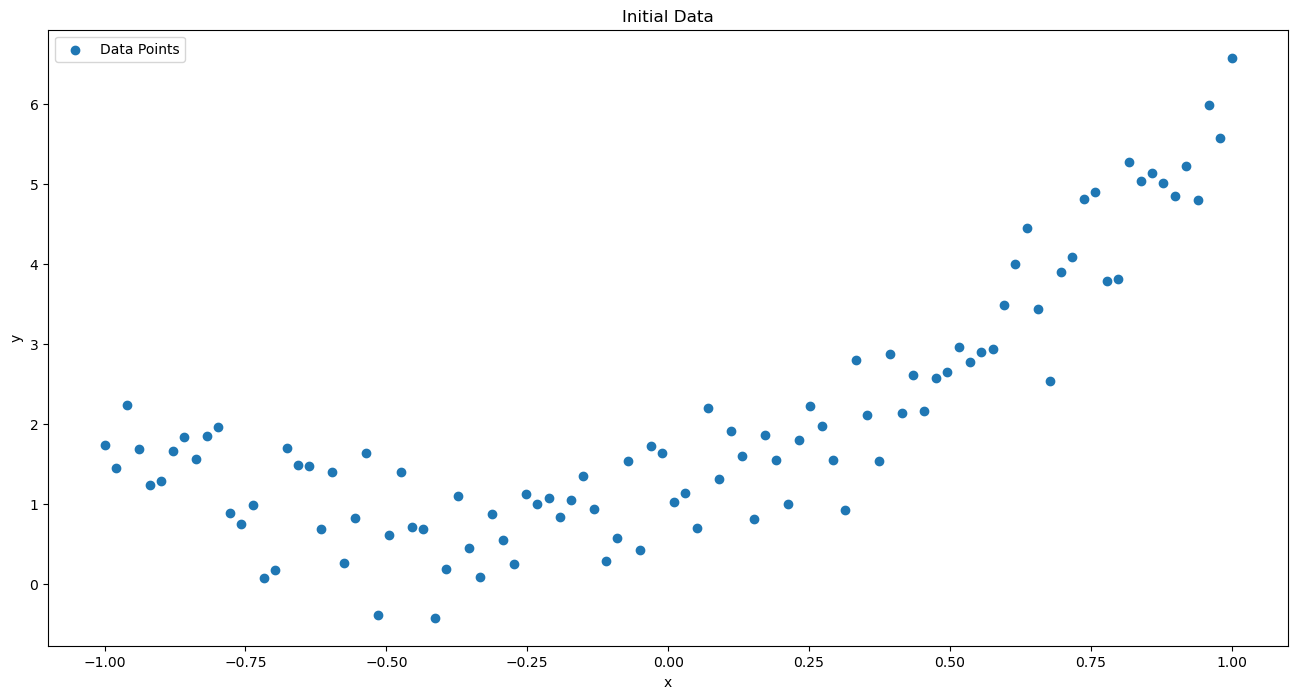

In [3]:
plt.figure(figsize=(16,8))
plt.scatter(x, y, label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial Data')
plt.legend()
plt.show()

In [212]:
x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y.reshape(-1, 1), test_size=0.2)

### Dataset B

In [99]:
df = pd.read_csv("archive/infy_stock.csv",
                 usecols=['Date', 'Close'], parse_dates=['Date'],index_col='Date')
df.head()

,Close
Date,
2015-01-01,1974.40
2015-01-02,2013.20
2015-01-05,1995.90
2015-01-06,1954.20
2015-01-07,1963.55


In [100]:
print("Min:",df.index.min())
print("Max:",df.index.max())

Min: 2015-01-01 00:00:00
Max: 2015-12-31 00:00:00


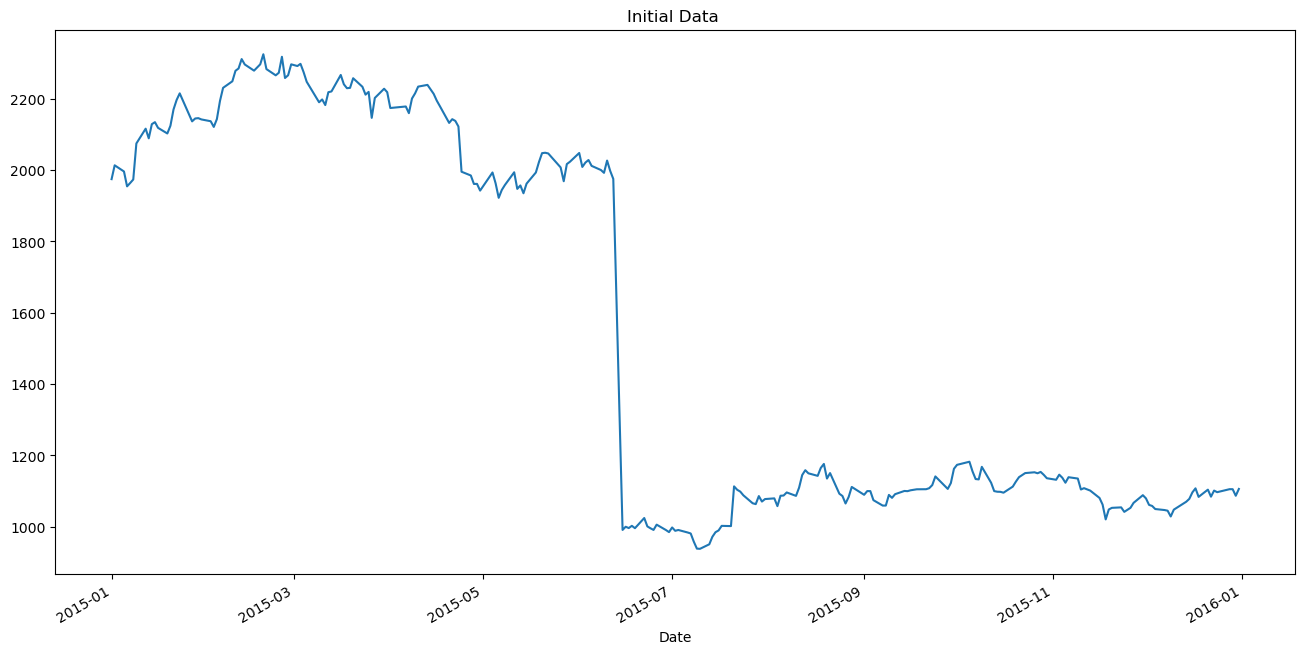

In [158]:
plt.figure(figsize=(16,8))
df.Close.plot()
plt.title("Initial Data ")
plt.show()

#### 15/06/2015 спостерігається величезне падіння, це було розділення ціни акцій. Якщо взяти ці дані, прогноз може бути не таким, як очікувалось, оскільки між ними є розкол.

#### Ми повинні або відкинути період, або скорегувати значення перед розділенням. Оскільки розділення дорівнює 2 для 1 періоду, ми можемо нормалізувати дані до поділу, поділивши їх на 2. (Старі частки вдвічі менші, ніж сьогоднішні).


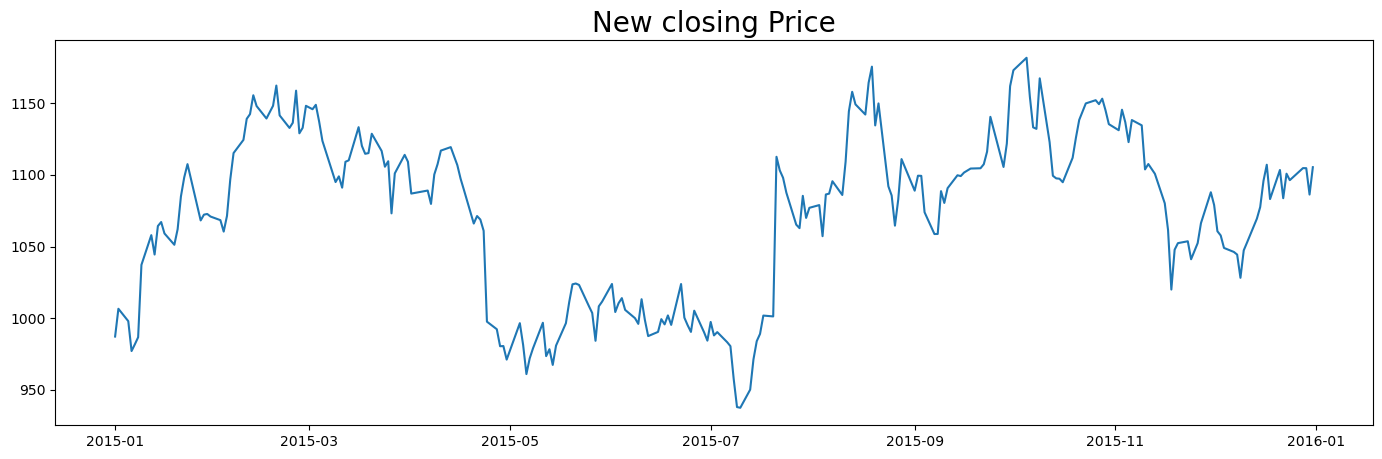

In [159]:
prices = pd.DataFrame(pd.concat([df.Close[:'2015-06-12']/2,df.Close['2015-06-15':]]))
plt.figure(figsize=(17,5))
plt.plot(prices)
plt.title("New closing Price",fontsize=20)
plt.show()

In [160]:
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values)

prices['Close'] = scaled_prices
prices

,Close
Date,
2015-01-01,0.203480
2015-01-02,0.282907
2015-01-05,0.247492
2015-01-06,0.162129
2015-01-07,0.181269
...,...
2015-12-24,0.650358
2015-12-28,0.684749
2015-12-29,0.684545


In [161]:
len(prices)

248

In [162]:
target_train_stock = prices.iloc[:180] #train
target_test_stock = prices.iloc[180:] #test

In [163]:
len(target_train_stock)

180

In [164]:
len(target_test_stock)

68

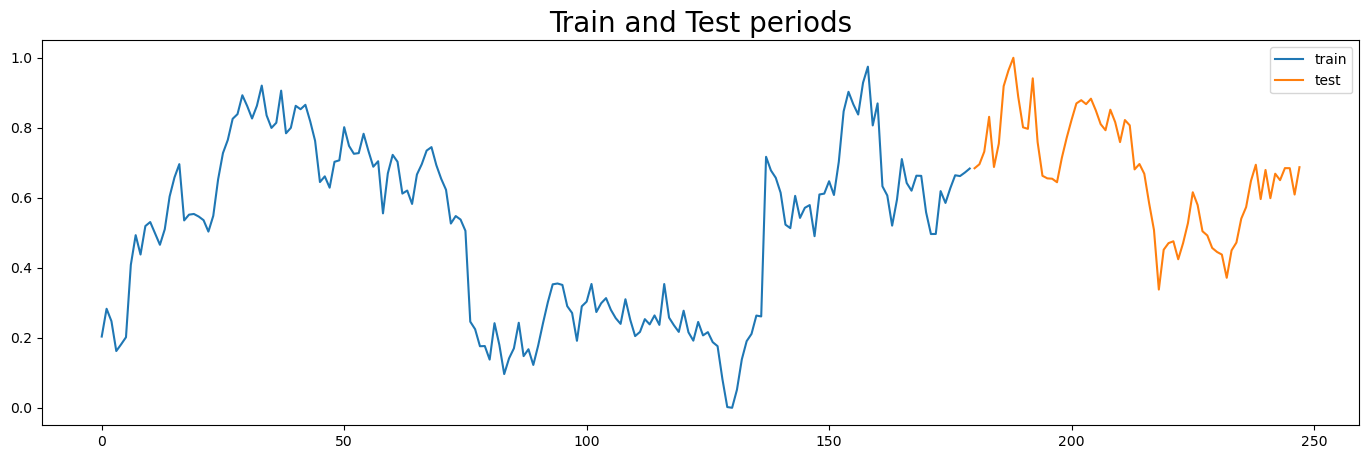

In [165]:
plt.figure(figsize=(17,5))
plt.plot(np.arange(0, len(target_train_stock)), target_train_stock, label='train')
plt.plot(np.arange(len(target_train_stock), len(target_train_stock)+len(target_test_stock)), target_test_stock, label='test')
plt.title("Train and Test periods", fontsize=20)
plt.legend()

In [186]:
target_train_stock = prices[80:180]

In [187]:
prices

,Close
Date,
2015-01-01,0.203480
2015-01-02,0.282907
2015-01-05,0.247492
2015-01-06,0.162129
2015-01-07,0.181269
...,...
2015-12-24,0.650358
2015-12-28,0.684749
2015-12-29,0.684545


In [180]:
# Define the window size
window_size = 80
stock = pd.DataFrame(index=prices.index[window_size:])

# Fill the training dataset
for i in range(window_size):
    stock[f'{-i-1}'] = prices['Close'].shift(i)

stock.dropna(inplace=True)
stock

,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,...,-71,-72,-73,-74,-75,-76,-77,-78,-79,-80
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-30,0.137666,0.176356,0.175844,0.224463,0.246059,0.505629,0.537769,0.547799,0.526407,0.622825,...,0.530706,0.519243,0.437871,0.493245,0.408291,0.201535,0.181269,0.162129,0.247492,0.282907
2015-05-04,0.241760,0.137666,0.176356,0.175844,0.224463,0.246059,0.505629,0.537769,0.547799,0.526407,...,0.498055,0.530706,0.519243,0.437871,0.493245,0.408291,0.201535,0.181269,0.162129,0.247492
2015-05-05,0.179632,0.241760,0.137666,0.176356,0.175844,0.224463,0.246059,0.505629,0.537769,0.547799,...,0.465711,0.498055,0.530706,0.519243,0.437871,0.493245,0.408291,0.201535,0.181269,0.162129
2015-05-06,0.096315,0.179632,0.241760,0.137666,0.176356,0.175844,0.224463,0.246059,0.505629,0.537769,...,0.510133,0.465711,0.498055,0.530706,0.519243,0.437871,0.493245,0.408291,0.201535,0.181269
2015-05-07,0.141249,0.096315,0.179632,0.241760,0.137666,0.176356,0.175844,0.224463,0.246059,0.505629,...,0.603685,0.510133,0.465711,0.498055,0.530706,0.519243,0.437871,0.493245,0.408291,0.201535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-24,0.650358,0.668782,0.598772,0.679427,0.596315,0.694371,0.648311,0.573388,0.540430,0.472057,...,0.619038,0.496622,0.496418,0.558649,0.662641,0.663050,0.620266,0.642375,0.710542,0.594882
2015-12-28,0.684749,0.650358,0.668782,0.598772,0.679427,0.596315,0.694371,0.648311,0.573388,0.540430,...,0.585261,0.619038,0.496622,0.496418,0.558649,0.662641,0.663050,0.620266,0.642375,0.710542
2015-12-29,0.684545,0.684749,0.650358,0.668782,0.598772,0.679427,0.596315,0.694371,0.648311,0.573388,...,0.627431,0.585261,0.619038,0.496622,0.496418,0.558649,0.662641,0.663050,0.620266,0.642375


In [183]:
train_stock = stock[:100]
test_stock = stock[100:]

####  X_train тепер є набором зі 100 дат в якості індексу та набором цін акцій за попередні 80 днів в якості ознак. Аналогічно, X_test тепер є набором з 68 дат в якості індексу та набором біржових цін за попередні 80 днів в якості ознак.

# Modeling 

In [225]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [226]:
# Parameters

alpha = 0.01
epochs = 200
batch_size = 32
regularization_param = 0.001  


In [227]:
# Data loaders

X = tf.placeholder(tf.float32, shape=[None, None], name='x-input')
Y = tf.placeholder(tf.float32, shape=[None, 1], name='y-input')

In [228]:
# Variables for coefficients

theta_1 = tf.Variable(tf.random.normal([1, 1]), name="theta_1", trainable=True)
theta_2 = tf.Variable(tf.random.normal([1, 1]), name="theta_2", trainable=True)
theta_3 = tf.Variable(tf.random.normal([1, 1]), name="theta_3", trainable=True)

In [229]:
# Polynomial regression model

model = tf.matmul(tf.pow(X, 2), theta_1) + tf.matmul(X, theta_2) + theta_3

In [230]:
# MSE 
m = x_train.shape[0]
cost = tf.reduce_sum(tf.square(Y - model)) / (2 * m) 

# L1 term
def regularize(origCost, Theta1, Theta2, Theta3, lambd):
    return origCost + lambd * (tf.abs(Theta1) + tf.abs(Theta2) + tf.abs(Theta3))[0][0]

cost = regularize(cost, theta_1, theta_2, theta_3, regularization_param)

In [231]:
# Optimizer

optimizer = tf.train.GradientDescentOptimizer(alpha).minimize(cost)

In [232]:
# TensorFlow initialization

init = tf.global_variables_initializer()

In [233]:
# TensorFlow saver

saver = tf.train.Saver()

#### Dataset A 

In [234]:
errors = []
with tf.Session() as sess:
        sess.run(init)
    
        for epoch in range(epochs):
            
            for i in range(0, len(x_train), batch_size):
                x_batch = x_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]
    
                _, c = sess.run([optimizer, cost], feed_dict={X: x_batch, Y: y_batch})

            errors.append(c)
            
            if (epoch + 1) % 10 == 0:
                print("Epoch:", epoch + 1, "Cost:", c)
                save_path = saver.save(sess, f"checkpoints/epoch_{epoch+1}.ckpt")
    
        # Predictions for visualization
        x_range = x.reshape(-1, 1)
        y_range_pred = sess.run(model, feed_dict={X:(x_range)})

print("Final Error:", errors[-1])

2024-03-29 19:26:49.719678: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


Epoch: 10 Cost: 0.27552944
Epoch: 20 Cost: 0.22940157
Epoch: 30 Cost: 0.19236456
Epoch: 40 Cost: 0.16260847
Epoch: 50 Cost: 0.13868469
Epoch: 60 Cost: 0.11943365
Instructions for updating:
Use standard file APIs to delete files with this prefix.
Epoch: 70 Cost: 0.103927016
Epoch: 80 Cost: 0.091421686
Epoch: 90 Cost: 0.08132266
Epoch: 100 Cost: 0.073153466
Epoch: 110 Cost: 0.06653253
Epoch: 120 Cost: 0.06115429
Epoch: 130 Cost: 0.056773886
Epoch: 140 Cost: 0.053195152
Epoch: 150 Cost: 0.050260928
Epoch: 160 Cost: 0.04784518
Epoch: 170 Cost: 0.045846865
Epoch: 180 Cost: 0.044184946
Epoch: 190 Cost: 0.042794447
Epoch: 200 Cost: 0.041623168
Final Error: 0.041623168


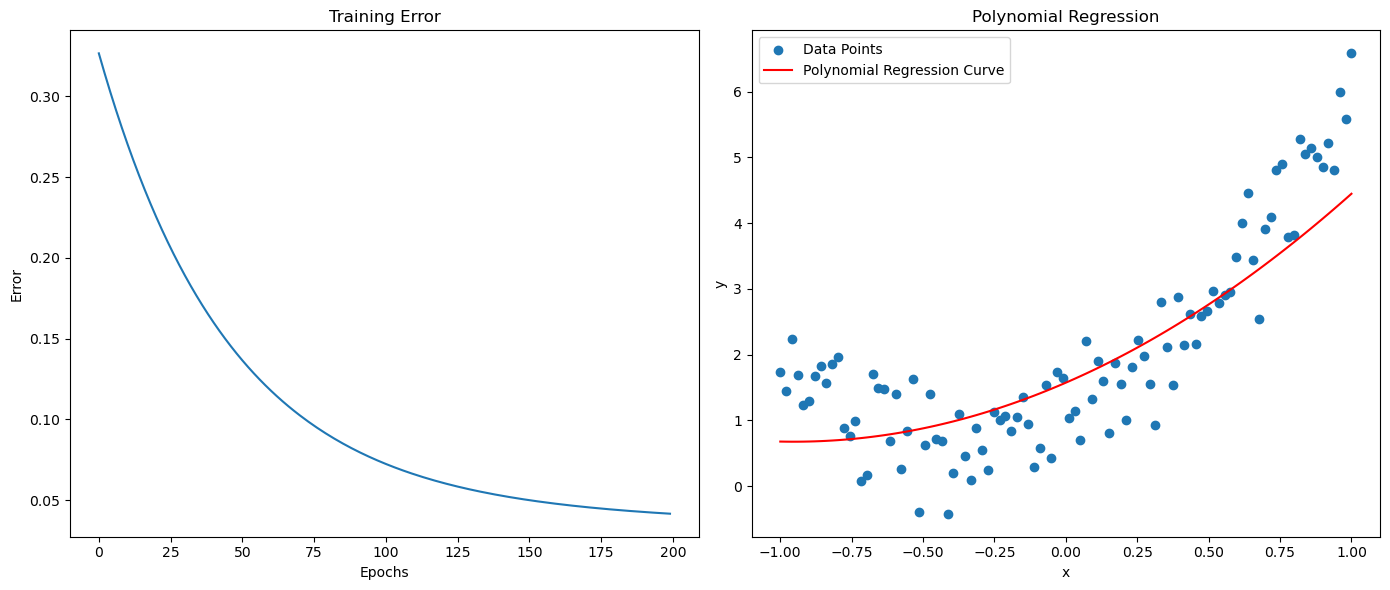

In [235]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot errors
axs[0].plot(errors)
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Error')
axs[0].set_title('Training Error')

# Regression line
axs[1].scatter(x, y, label='Data Points')
axs[1].plot(x_range, y_range_pred, color='red', label='Polynomial Regression Curve')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Polynomial Regression')

axs[1].legend()

plt.tight_layout()
plt.show()

In [236]:
with tf.Session() as sess :
    saver.restore(sess, "checkpoints/epoch_200.ckpt")
    
    sess.run(tf.global_variables_initializer())
    final_error = sess.run(cost, feed_dict={X: x_test, Y: y_test})

print(f'MSE on test set = {final_error}')

INFO:tensorflow:Restoring parameters from checkpoints/epoch_200.ckpt
MSE on test set = 2.551814556121826


2024-03-29 19:26:52.596494: W tensorflow/c/c_api.cc:305] Operation '{name:'theta_3/Assign' id:32 op device:{requested: '', assigned: ''} def:{{{node theta_3/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](theta_3, random_normal_2)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


#### Dataset B

In [237]:
train_stock = np.array(train_stock).astype(float)
train_stock.shape

(100, 80)

In [238]:
target_train_stock = np.array(target_train_stock).reshape(-1, 1).astype(float)
target_train_stock.shape

(100, 1)

In [239]:
# Variables for coefficients

theta_1 = tf.Variable(tf.random.normal([80, 1]), mean = 0.0, stddev = 0.2, name="theta_1", trainable=True)
theta_2 = tf.Variable(tf.random.normal([80, 1]), mean = 0.0, stddev = 0.2, name="theta_2", trainable=True)
theta_3 = tf.Variable(tf.random.normal([1, 1]), mean = 0.0, stddev = 0.2, name="theta_3", trainable=True)

In [308]:
# Parameters

alpha = 0.01
epochs = 1000
batch_size = 100
regularization_param = 0.1

# MSE 
m = train_stock.shape[0]
print(m)

100


In [309]:
errors = []
with tf.Session() as sess:
        sess.run(init)
    
        for epoch in range(epochs):
            
            for i in range(0, train_stock.shape[0], batch_size):
                
                x_batch = train_stock[i:i+batch_size]                
                y_batch = target_train_stock[i:i+batch_size]

                # print(x_batch)
                # print(y_batch)
                
                _, c = sess.run([optimizer, cost], feed_dict={X: x_batch, Y: y_batch})

            errors.append(c)
            
            if (epoch + 1) % 10 == 0:
                print("Epoch:", epoch + 1, "Cost:", c)
                save_path = saver.save(sess, f"checkpoints/epoch_{epoch+1}.ckpt")
    
        # Predictions for visualization
        x_range = test_stock
        y_range_pred = sess.run(model, feed_dict={X:(x_range)})

print("Final Error:", errors[-1])

Epoch: 10 Cost: 1.8451155
Epoch: 20 Cost: 1.5326024
Epoch: 30 Cost: 1.3311903
Epoch: 40 Cost: 1.1945257
Epoch: 50 Cost: 1.0972836
Epoch: 60 Cost: 1.0251082
Epoch: 70 Cost: 0.96952987
Epoch: 80 Cost: 0.9253383
Epoch: 90 Cost: 0.88919616
Epoch: 100 Cost: 0.8588869
Epoch: 110 Cost: 0.8328921
Epoch: 120 Cost: 0.810147
Epoch: 130 Cost: 0.78988993
Epoch: 140 Cost: 0.7715676
Epoch: 150 Cost: 0.75477386
Epoch: 160 Cost: 0.73920757
Epoch: 170 Cost: 0.7246434
Epoch: 180 Cost: 0.7109116
Epoch: 190 Cost: 0.6978826
Epoch: 200 Cost: 0.68545747
Epoch: 210 Cost: 0.6735589
Epoch: 220 Cost: 0.6621269
Epoch: 230 Cost: 0.6511133
Epoch: 240 Cost: 0.6404796
Epoch: 250 Cost: 0.6301942
Epoch: 260 Cost: 0.62023115
Epoch: 270 Cost: 0.6105685
Epoch: 280 Cost: 0.6011875
Epoch: 290 Cost: 0.592072
Epoch: 300 Cost: 0.5832076
Epoch: 310 Cost: 0.5745819
Epoch: 320 Cost: 0.5661833
Epoch: 330 Cost: 0.5580016
Epoch: 340 Cost: 0.55002743
Epoch: 350 Cost: 0.54225206
Epoch: 360 Cost: 0.5346675
Epoch: 370 Cost: 0.5272664
Epo

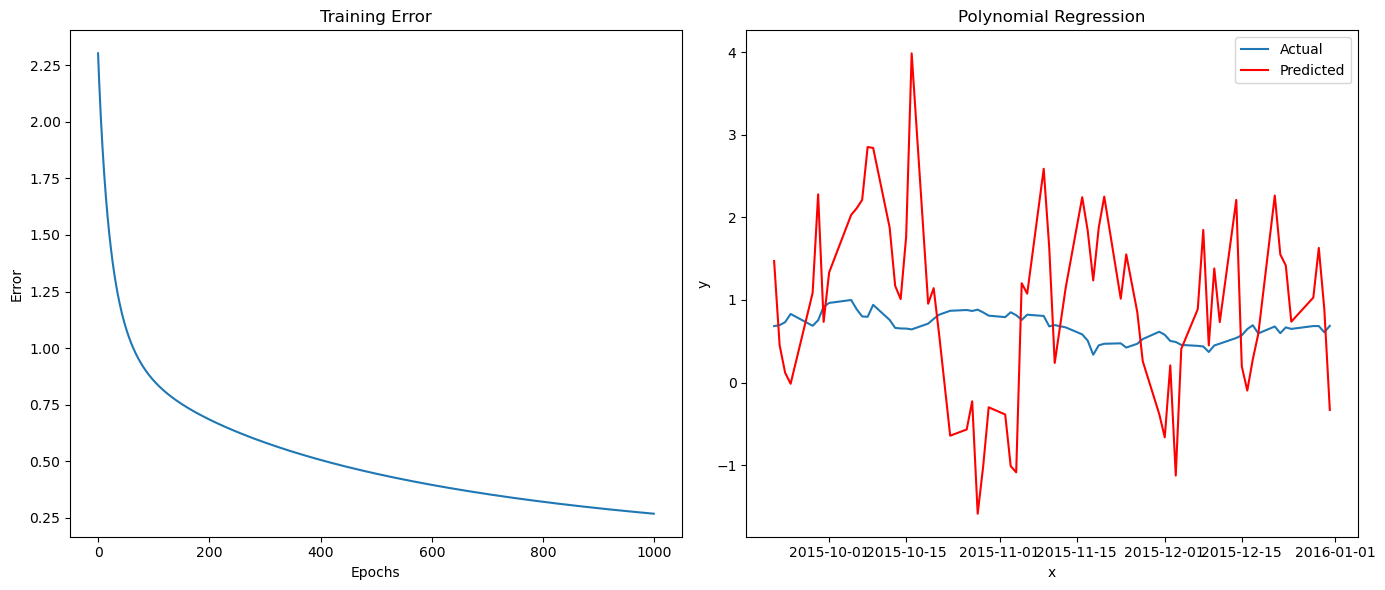

In [312]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot errors
axs[0].plot(errors)
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Error')
axs[0].set_title('Training Error')

# Regression line
axs[1].plot(prices[180:].index, target_test_stock, label='Actual')
axs[1].plot(prices[180:].index, y_range_pred, color='red', label='Predicted')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Polynomial Regression')

axs[1].legend()

plt.tight_layout()
plt.show()

In [313]:
with tf.Session() as sess :
    saver.restore(sess, "checkpoints/epoch_1000.ckpt")
    
    sess.run(tf.global_variables_initializer())
    final_error = sess.run(cost, feed_dict={X: test_stock, Y: target_test_stock})

print(f'MSE on test set = {final_error}')

INFO:tensorflow:Restoring parameters from checkpoints/epoch_1000.ckpt
MSE on test set = 20.840198516845703


2024-03-29 19:44:02.025894: W tensorflow/c/c_api.cc:305] Operation '{name:'theta_3_1/Assign' id:214 op device:{requested: '', assigned: ''} def:{{{node theta_3_1/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](theta_3_1, random_normal_5)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


# **Keras**

### Щоб запустити код нижче, потрібно рестартнути ядро і заново ініціалізувати дані, а далі продовжувати звідси. Це через використання ріних версії тенсорфлоу.

In [184]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)

2.16.1


#### Dataset A

In [213]:
ds_train = tf.data.Dataset.from_tensor_slices(
    (tf.cast(x_train, tf.float32),
     tf.cast(y_train, tf.float32)))

ds_test = tf.data.Dataset.from_tensor_slices(
    (tf.cast(x_test, tf.float32),
     tf.cast(y_test, tf.float32)))

#### Dataset B

In [208]:
ds_train_stock = tf.data.Dataset.from_tensor_slices(
    (tf.cast(train_stock, tf.float32),
     tf.cast(target_train_stock, tf.float32)))

ds_test_stock = tf.data.Dataset.from_tensor_slices(
    (tf.cast(test_stock, tf.float32),
     tf.cast(target_test_stock, tf.float32)))

## Modeling

#### Dataset A

In [215]:
model = Sequential([
    Dense(25, input_shape=(1,), activation='relu'), 
    Dense(10, activation='relu'), 
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)

history = model.fit(ds_train.batch(32).shuffle(buffer_size=1000), 
                    validation_data=ds_test.batch(100),
                    callbacks=[monitor],
                    verbose=2, epochs=200)



Epoch 1/200
3/3 - 1s - 463ms/step - loss: 6.2024 - val_loss: 7.5896
Epoch 2/200
3/3 - 0s - 15ms/step - loss: 6.1579 - val_loss: 7.5348
Epoch 3/200
3/3 - 0s - 4ms/step - loss: 6.1102 - val_loss: 7.4822
Epoch 4/200
3/3 - 0s - 6ms/step - loss: 6.0666 - val_loss: 7.4388
Epoch 5/200
3/3 - 0s - 6ms/step - loss: 6.0292 - val_loss: 7.3943
Epoch 6/200
3/3 - 0s - 6ms/step - loss: 5.9935 - val_loss: 7.3486
Epoch 7/200
3/3 - 0s - 11ms/step - loss: 5.9544 - val_loss: 7.3025
Epoch 8/200
3/3 - 0s - 4ms/step - loss: 5.9146 - val_loss: 7.2563
Epoch 9/200
3/3 - 0s - 12ms/step - loss: 5.8725 - val_loss: 7.2098
Epoch 10/200
3/3 - 0s - 8ms/step - loss: 5.8324 - val_loss: 7.1624
Epoch 11/200
3/3 - 0s - 15ms/step - loss: 5.7915 - val_loss: 7.1141
Epoch 12/200
3/3 - 0s - 5ms/step - loss: 5.7501 - val_loss: 7.0635
Epoch 13/200
3/3 - 0s - 10ms/step - loss: 5.7031 - val_loss: 7.0071
Epoch 14/200
3/3 - 0s - 7ms/step - loss: 5.6542 - val_loss: 6.9481
Epoch 15/200
3/3 - 0s - 6ms/step - loss: 5.6010 - val_loss: 6.88

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/stepWARNING:tensorflow:5 out of the last 44 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7f295e94be20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


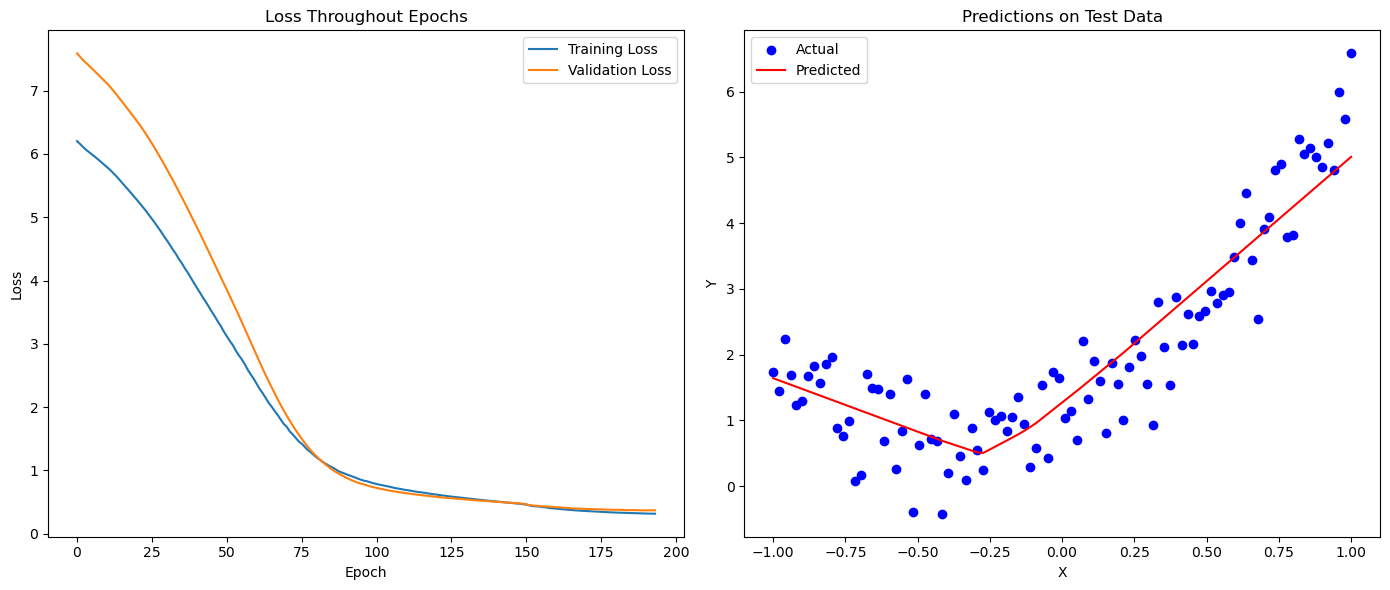

In [217]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualize loss throughout epochs
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss Throughout Epochs')
axes[0].legend()

# Visualize predictions on full data
full_data = np.linspace(-1, 1, 100)
f_preds = model.predict(full_data)

axes[1].scatter(full_data, y, color='blue', label='Actual')
axes[1].plot(full_data, f_preds, color='red', label='Predicted')


axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].set_title('Predictions on Test Data')
axes[1].legend()

plt.tight_layout()
plt.show()

#### Dataset B

In [209]:
model = Sequential([
    Dense(25, input_shape=(80,), activation='relu'), 
    Dense(10, activation='relu'), 
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

# monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
#                         patience=5, verbose=1, mode='auto', 
#                         restore_best_weights=True)

history = model.fit(ds_train_stock.batch(32).shuffle(buffer_size=1000), 
                    validation_data=ds_test_stock.batch(100),
                    # callbacks=[monitor],
                    verbose=2, epochs=200)



Epoch 1/200
4/4 - 1s - 304ms/step - loss: 0.7770 - val_loss: 0.9331
Epoch 2/200
4/4 - 0s - 3ms/step - loss: 0.4484 - val_loss: 0.5343
Epoch 3/200
4/4 - 0s - 3ms/step - loss: 0.2725 - val_loss: 0.2874
Epoch 4/200
4/4 - 0s - 3ms/step - loss: 0.1644 - val_loss: 0.1658
Epoch 5/200
4/4 - 0s - 3ms/step - loss: 0.1143 - val_loss: 0.1128
Epoch 6/200
4/4 - 0s - 3ms/step - loss: 0.0976 - val_loss: 0.0729
Epoch 7/200
4/4 - 0s - 3ms/step - loss: 0.0704 - val_loss: 0.0492
Epoch 8/200
4/4 - 0s - 2ms/step - loss: 0.0635 - val_loss: 0.0321
Epoch 9/200
4/4 - 0s - 2ms/step - loss: 0.0514 - val_loss: 0.0240
Epoch 10/200
4/4 - 0s - 3ms/step - loss: 0.0447 - val_loss: 0.0213
Epoch 11/200
4/4 - 0s - 3ms/step - loss: 0.0440 - val_loss: 0.0216
Epoch 12/200
4/4 - 0s - 3ms/step - loss: 0.0413 - val_loss: 0.0227
Epoch 13/200
4/4 - 0s - 3ms/step - loss: 0.0385 - val_loss: 0.0234
Epoch 14/200
4/4 - 0s - 3ms/step - loss: 0.0372 - val_loss: 0.0227
Epoch 15/200
4/4 - 0s - 3ms/step - loss: 0.0351 - val_loss: 0.0212
Ep

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


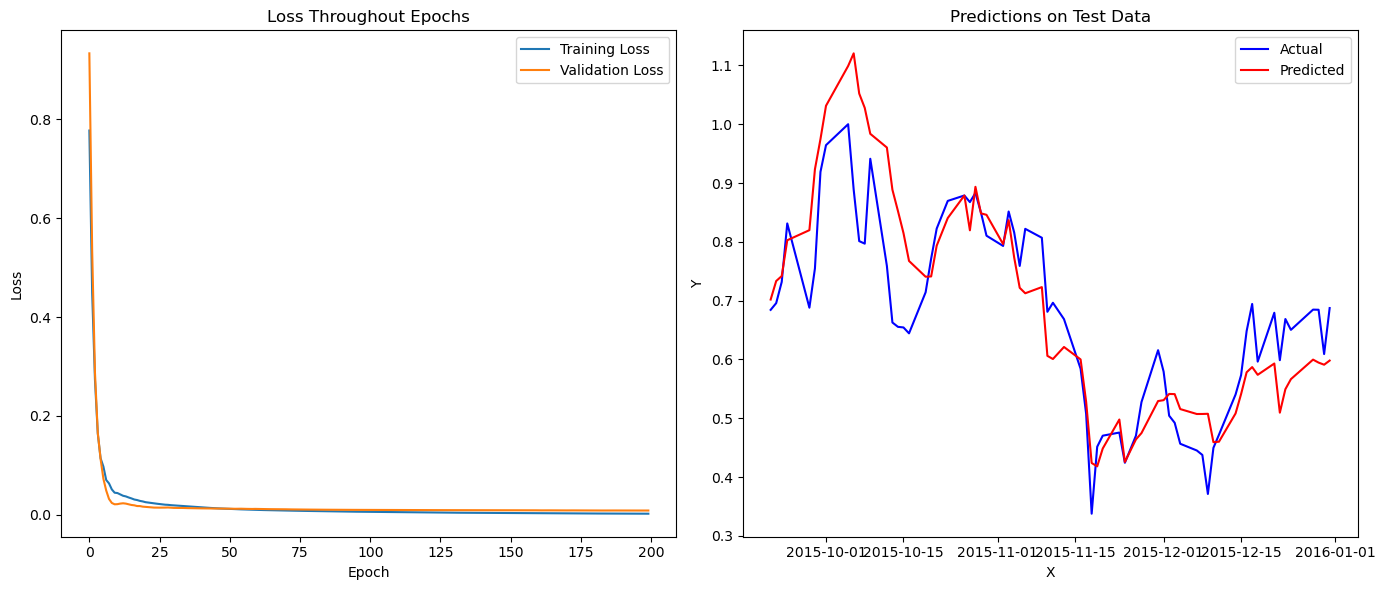

In [210]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualize loss throughout epochs
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss Throughout Epochs')
axes[0].legend()

# Visualize predictions on full data
test_preds = model.predict(test_stock)

axes[1].plot(prices[180:].index, prices[180:], color='blue', label='Actual')
axes[1].plot(prices[180:].index, test_preds, color='red', label='Predicted')


axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].set_title('Predictions on Test Data')
axes[1].legend()

plt.tight_layout()
plt.show()